# データ作成

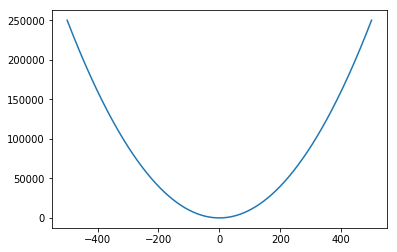

In [175]:
import numpy as np
import matplotlib.pyplot as plt

x2 = list(range(-5000,5001,1))
x = [i*0.1 for i in x2] 
y = [i**2 for i in x]
plt.plot(x,y)
plt.show()

# SGD

In [114]:
x_loc = x[-1]
memo_sgd = []
for i in range(10):
    e = 2*x_loc
    x_loc = x_loc - 0.05*e  
    idx = np.abs(np.asarray(x) - x_loc).argmin()
    x_loc = x[idx]
    memo_sgd.append(x_loc)

# モメンタム法

In [115]:
x_loc = x[-1]
myu = 0.5
memo_mom = []
for i in range(10):
    e = 2*x_loc
    x_loc = myu*x_loc - (1-myu)*0.05*e 
    idx = np.abs(np.asarray(x) - x_loc).argmin()
    x_loc = x[idx]
    memo_mom.append(x_loc)

# ネステロフの加速勾配降下法

In [116]:
x_loc = x[-1]
x_loc_memo = [x_loc]
myu = 0.5
memo_nes = []
for i in range(10):
    if i==0:
        e = 2*x_loc
    else:
        e = 2*(myu*x_loc_memo[-2]+x_loc_memo[-1])
    x_loc = myu*x_loc - (1-myu)*0.05*e 
    idx = np.abs(np.asarray(x) - x_loc).argmin()
    x_loc = x[idx]
    x_loc_memo.append(x_loc)
    memo_nes.append(x_loc)

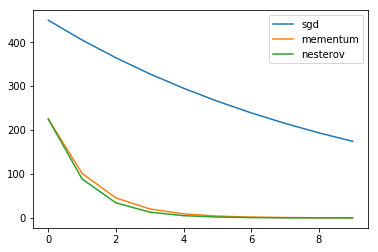

In [117]:
plt.plot(memo_sgd, label="sgd")
plt.plot(memo_mom, label="mementum")
plt.plot(memo_nes, label="nesterov")
plt.legend()
plt.show()

# ３つをまとめてクラス化

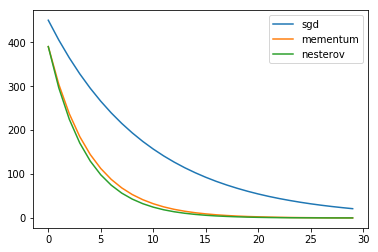

In [201]:
class Convergense():
    def __init__(self,x,y,lr,iteration):
        self.x = x
        self.y = y
        self.lr = lr
        self.iteration = iteration
        
    def sgd(self):
        x_loc = self.x[-1]
        memo_sgd = []
        for i in range(self.iteration):
            e = 2*x_loc
            x_loc = x_loc - self.lr*e  
            idx = np.abs(np.asarray(x) - x_loc).argmin()
            x_loc = x[idx]
            memo_sgd.append(x_loc)
        return memo_sgd
        
    def momentum(self, myu):
        x_loc = self.x[-1]
        memo_mom = []
        for i in range(self.iteration):
            e = 2*x_loc
            x_loc = myu*x_loc - (1-myu)*self.lr*e 
            idx = np.abs(np.asarray(x) - x_loc).argmin()
            x_loc = x[idx]
            memo_mom.append(x_loc)
        return memo_mom
    
    def nesterov(self,myu):
        x_loc = self.x[-1]
        x_loc_memo = [x_loc]
        memo_nes = []
        for i in range(self.iteration):
            if i==0:
                e = 2*x_loc
            else:
                e = 2*(myu*x_loc_memo[-2]+x_loc_memo[-1])
            x_loc = myu*x_loc - (1-myu)*self.lr*e 
            idx = np.abs(np.asarray(x) - x_loc).argmin()
            x_loc = x[idx]
            x_loc_memo.append(x_loc)
            memo_nes.append(x_loc)
        return memo_nes
    
test = Convergense(x,y,0.05,30)
memo_sgd = test.sgd()
memo_mom = test.momentum(0.8)
memo_nes = test.nesterov(0.8)
plt.plot(memo_sgd, label="sgd")
plt.plot(memo_mom, label="mementum")
plt.plot(memo_nes, label="nesterov")
plt.legend()
plt.show()

# 変数名とか汚いのでリファクタリング

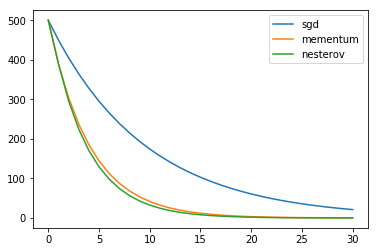

In [200]:
class Convergense():
    def __init__(self,x_data,y_data,lr,iteration):
        self.x_data = x_data
        self.y_data = y_data
        self.lr = lr
        self.iteration = iteration
        
    def sgd(self):
        x_now = self.x_data[-1]
        x_now_memo = [x_now]
        for i in range(self.iteration):
            diff_func = 2*x_now
            x_now_loc = x_now - self.lr*diff_func  
            idx = np.abs(np.asarray(self.x_data) - x_now_loc).argmin()
            x_now = self.x_data[idx]
            x_now_memo.append(x_now)
        return x_now_memo
        
    def momentum(self, myu):
        x_now = self.x_data[-1]
        x_now_memo = [x_now]
        for i in range(self.iteration):
            diff_func = 2*x_now
            x_now_loc = myu*x_now - (1-myu)*self.lr*diff_func 
            idx = np.abs(np.asarray(self.x_data) - x_now_loc).argmin()
            x_now = self.x_data[idx]
            x_now_memo.append(x_now)
        return x_now_memo

    
    def nesterov(self,myu):
        x_now = self.x_data[-1]
        x_now_memo = [x_now]
        for i in range(self.iteration):
            if i==0:
                diff_func = 2*x_now
            else:
                diff_func = 2*(myu*x_now_memo[-2]+x_now_memo[-1])
            x_now_loc = myu*x_now - (1-myu)*self.lr*diff_func 
            idx = np.abs(np.asarray(self.x_data) - x_now_loc).argmin()
            x_now = x[idx]
            x_now_memo.append(x_now)
        return  x_now_memo
    
test = Convergense(x,y,0.05,30)
memo_sgd = test.sgd()
memo_mom = test.momentum(0.8)
memo_nes = test.nesterov(0.8)

plt.plot(memo_sgd, label="sgd")
plt.plot(memo_mom, label="mementum")
plt.plot(memo_nes, label="nesterov")
plt.legend()
plt.show()